In [85]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [87]:
# 2. Load Dataset
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [88]:
# Preview the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
# Check for missing values
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Glucose: 0 zeros
BloodPressure: 0 zeros
SkinThickness: 0 zeros
Insulin: 0 zeros
BMI: 0 zeros


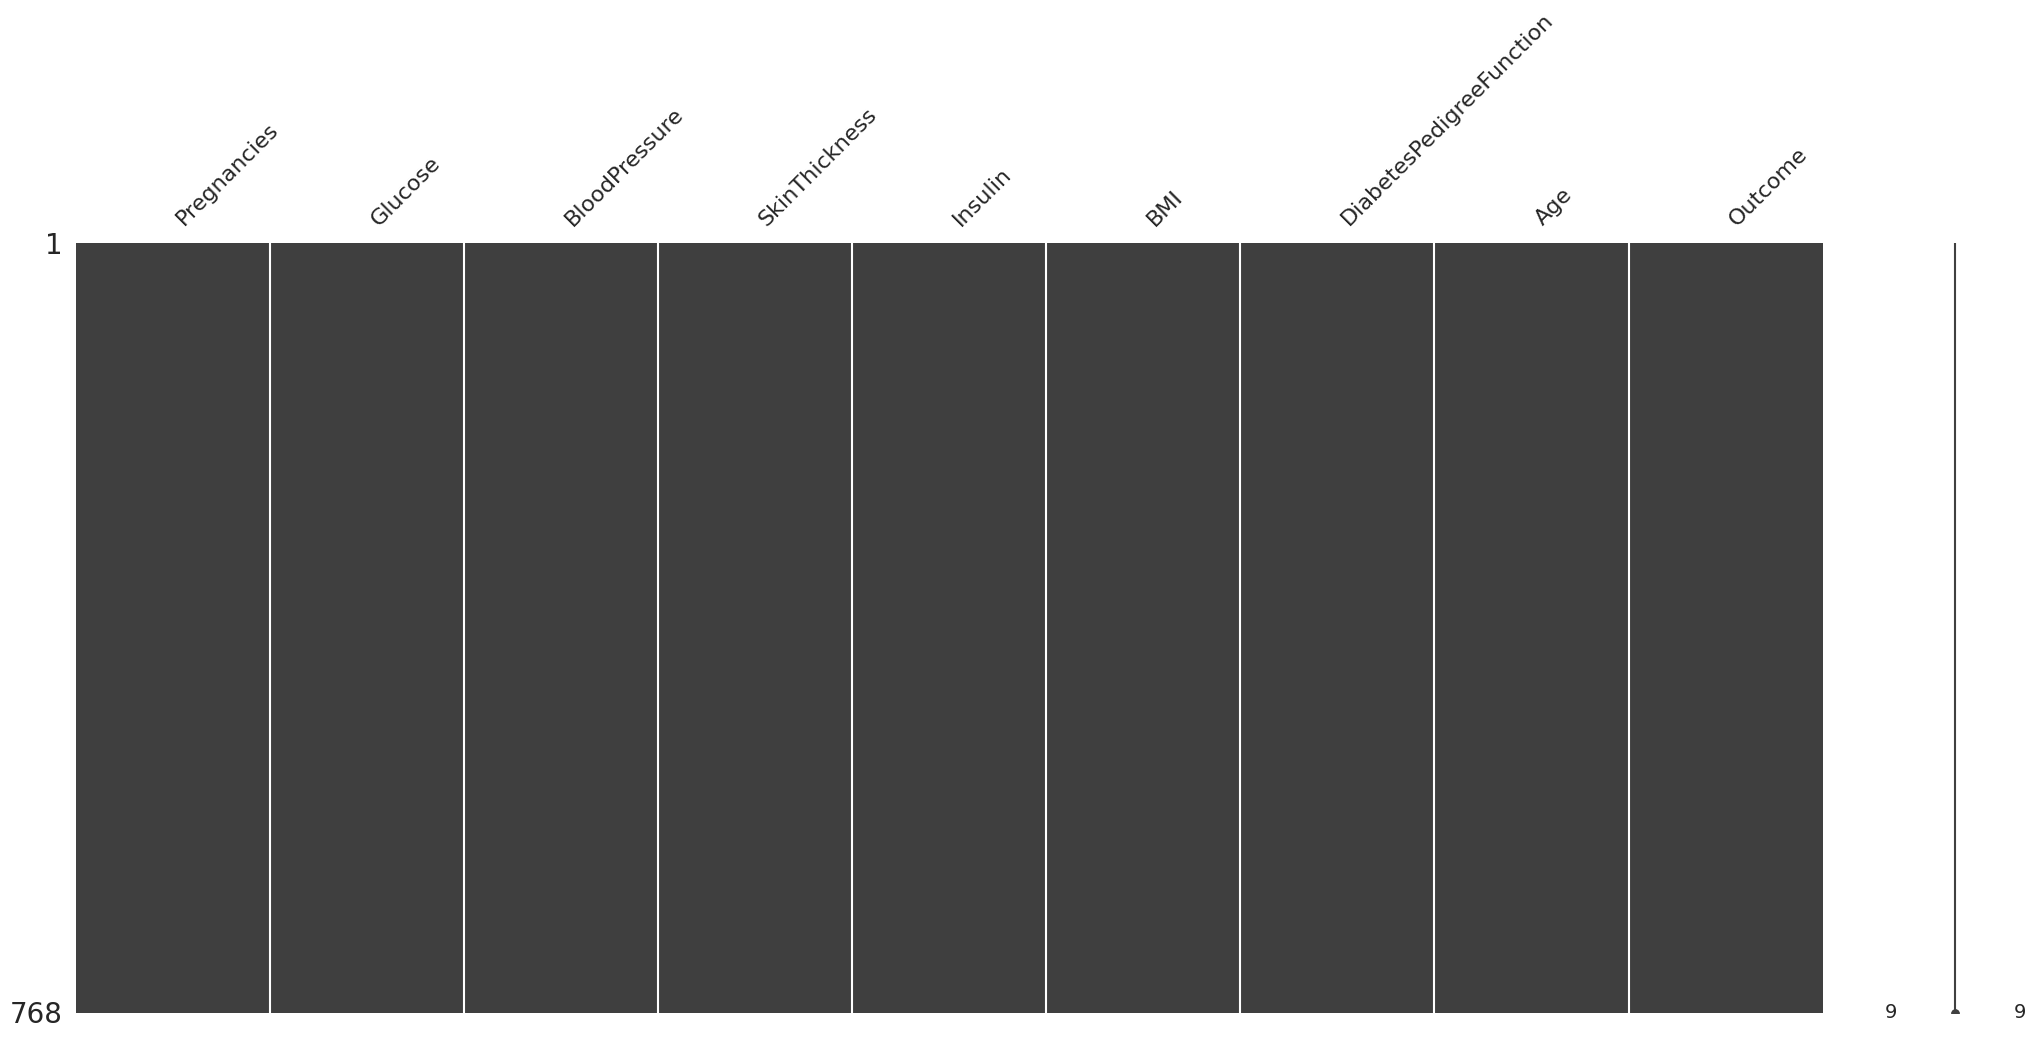

In [92]:
# Columns with invalid zeros
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zeros before replacement
for col in cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")

# Replace zeros with NaN
df[cols] = df[cols].replace(0, np.nan)

# Visualize missing data
import missingno as msno
msno.matrix(df)

# Fill NaNs with median values
for col in cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)


In [93]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [95]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


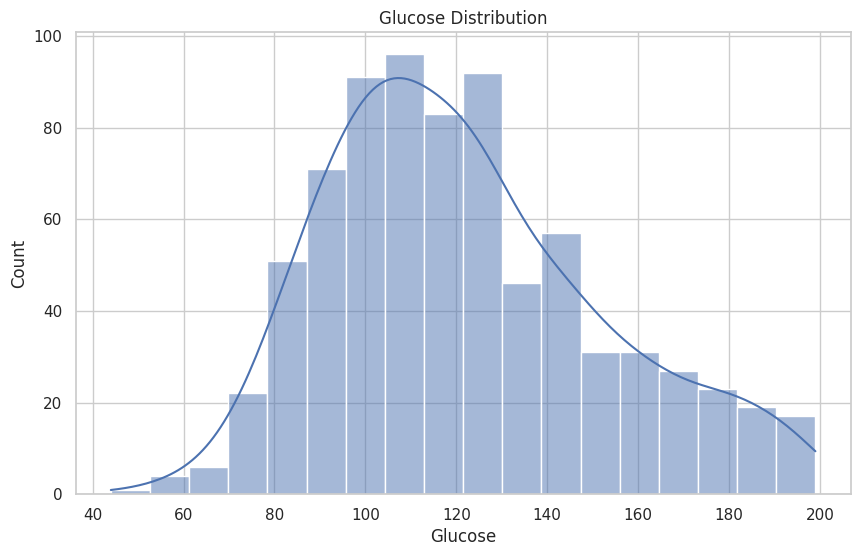

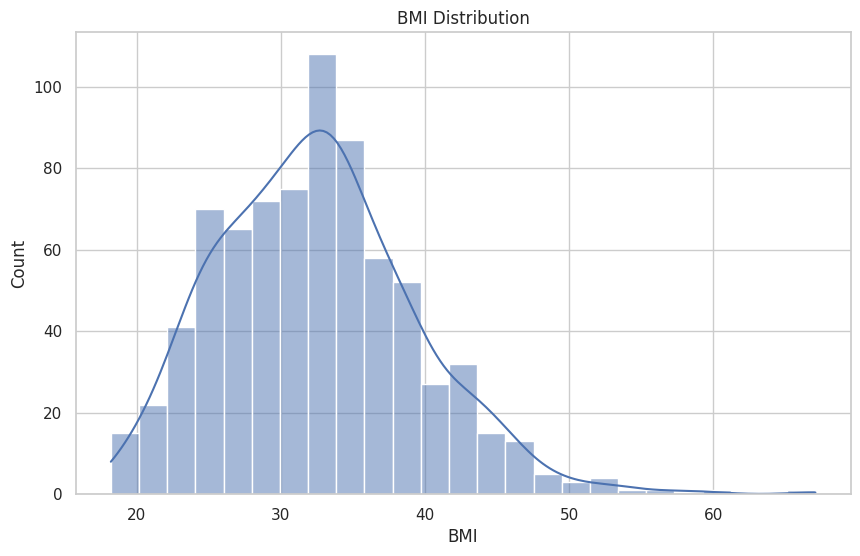

In [96]:

# Histogram of Glucose
sns.histplot(df['Glucose'], kde=True)
plt.title('Glucose Distribution')
plt.show()

# Histogram of BMI
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')
plt.show()


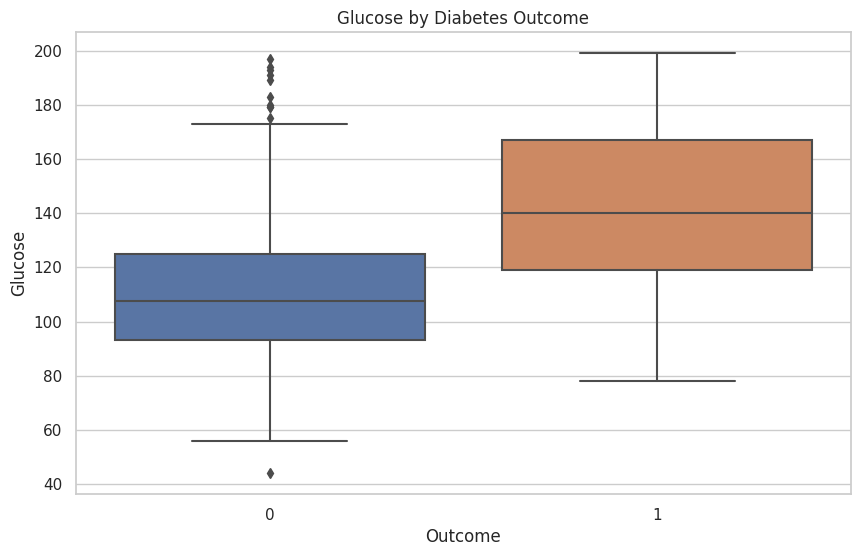

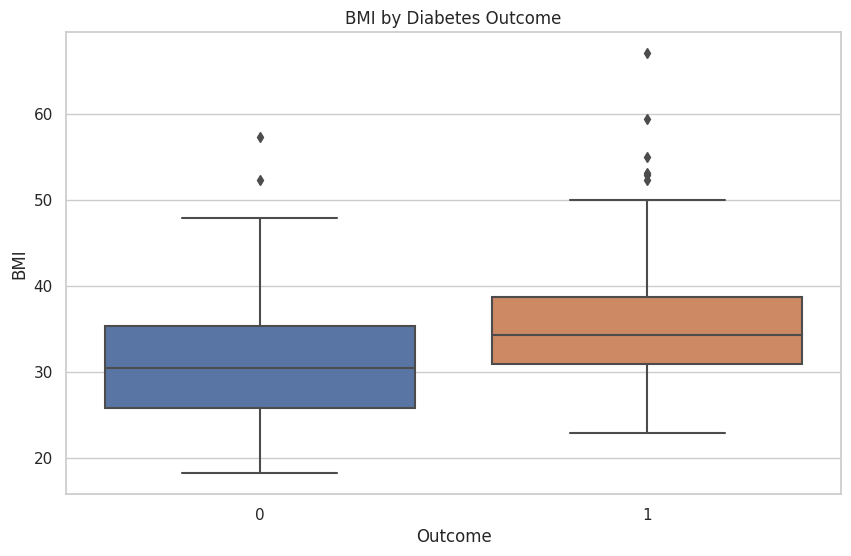

In [97]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose by Diabetes Outcome')
plt.show()

sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI by Diabetes Outcome')
plt.show()


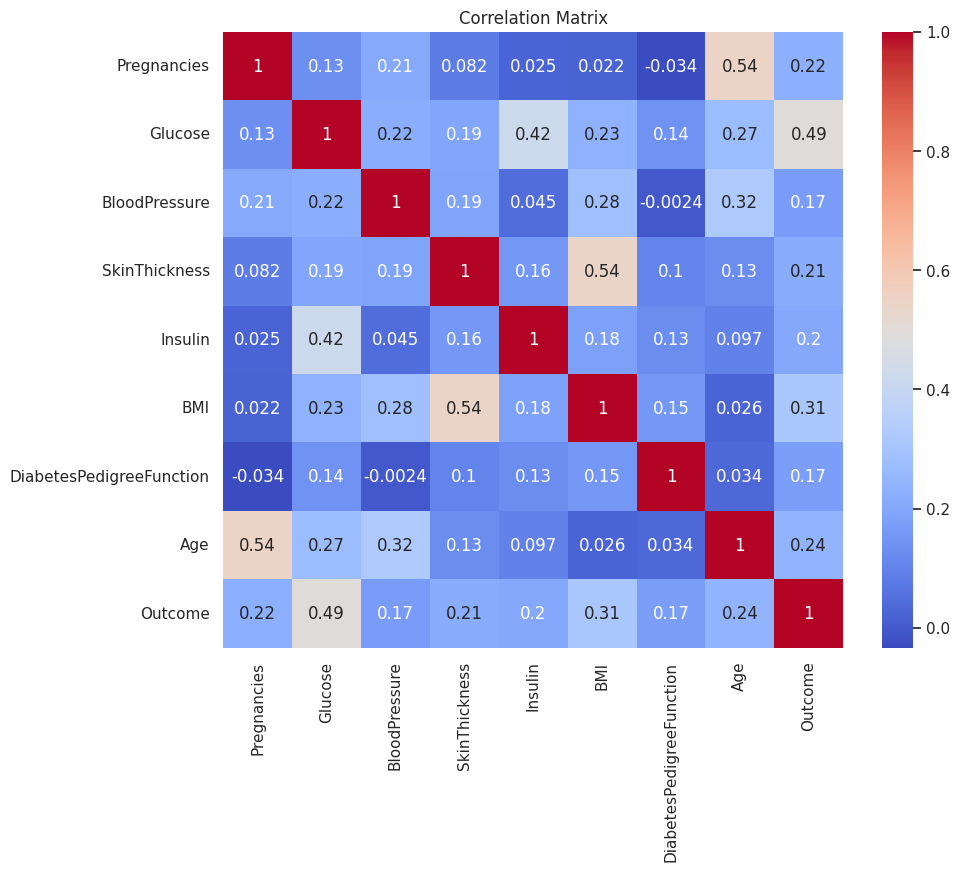

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [99]:
# Group by Outcome and calculate mean of each column
df.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


In [100]:
df.groupby('Outcome').median()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.5,72.0,29.0,125.0,30.40,0.336,27.0
1,4.0,140.0,74.0,29.0,125.0,34.25,0.449,36.0


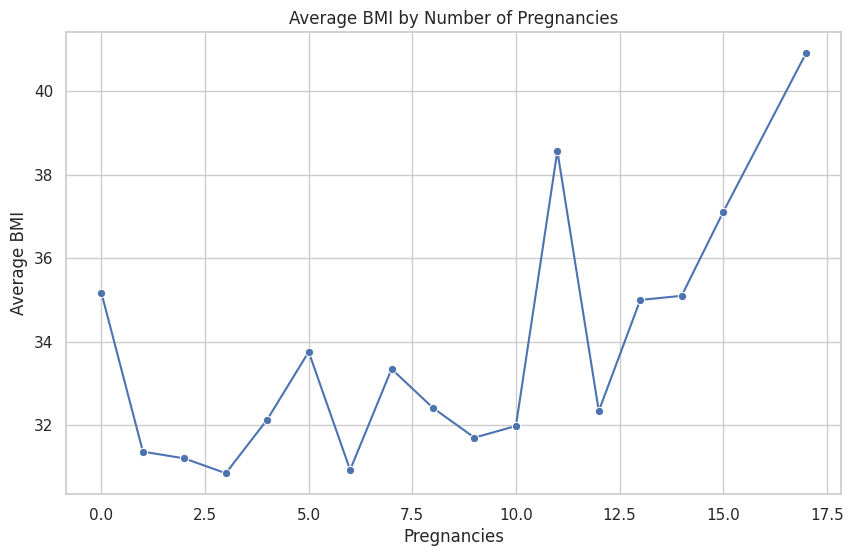

In [101]:
preg_bmi = df.groupby('Pregnancies')['BMI'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=preg_bmi, x='Pregnancies', y='BMI', marker='o')
plt.title('Average BMI by Number of Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Average BMI')
plt.show()


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

